In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-campaign-dataset/dataset.csv


**Import**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [4]:
df = pd.read_csv('/kaggle/input/bank-marketing-campaign-dataset/dataset.csv')

* **age_group: The age group of the customer.**

* **occupation: The occupation of the customer.**

* **marital_status: The marital status of the customer.**

* **education_level: The highest education level attained by the customer.**

* **communication_channel: The communication channel used for contacting the customer.**

* **call_day: The day of the month on which the call was made.**

* **call_month: The month of the year in which the call was made.**

* **call_duration: The duration of the call in seconds.**

* **call_frequency: The frequency of calls made to the customer.**

* **previous_campaign_outcome: The outcome of the previous marketing campaign for the customer.**

* **conversion_status: Whether the customer was converted or not.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [6]:
df.shape

(45211, 11)

In [7]:
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


**Missing Value Check**

In [8]:
df.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

**Duplicated value check**

In [9]:
df.duplicated().sum()

6

# **2. Data Transform**

In [10]:
df = df.drop_duplicates()

In [11]:
df = df.rename(columns = {'marital_status':'marry',
                          'communication_channel':'channel',
                          'previous_campaign_outcome': 'previous_outcome'})

**Data Check**

In [12]:
df.head()

,occupation,age,education_level,marry,channel,call_month,call_day,call_duration,call_frequency,previous_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


# **3. Data Visualization**

In [13]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(exclude=['int64']).columns

**Histogram**

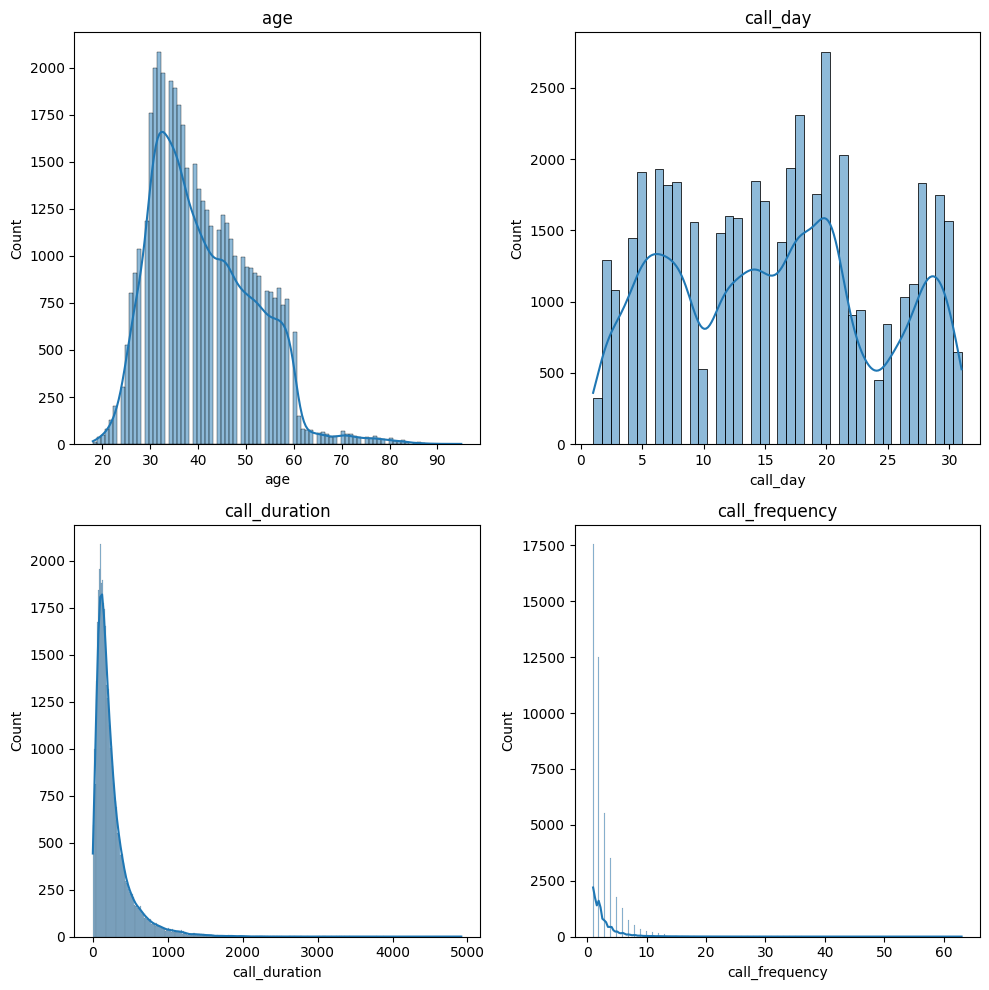

In [14]:
f, ax = plt.subplots(2,2, figsize=(10, 10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()   

**Boxplot**

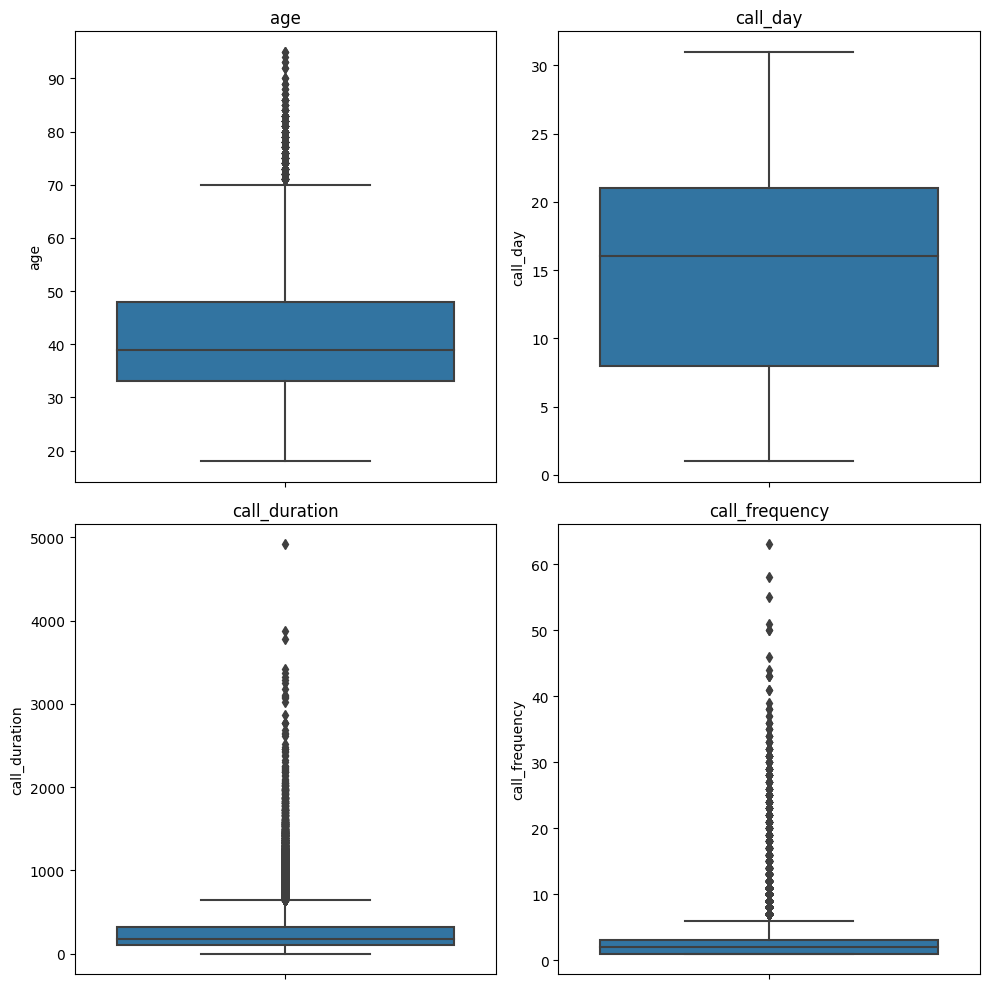

In [15]:
f, ax = plt.subplots(2,2, figsize=(10, 10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data= df, y = cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

---------

**Count by cat_cols**

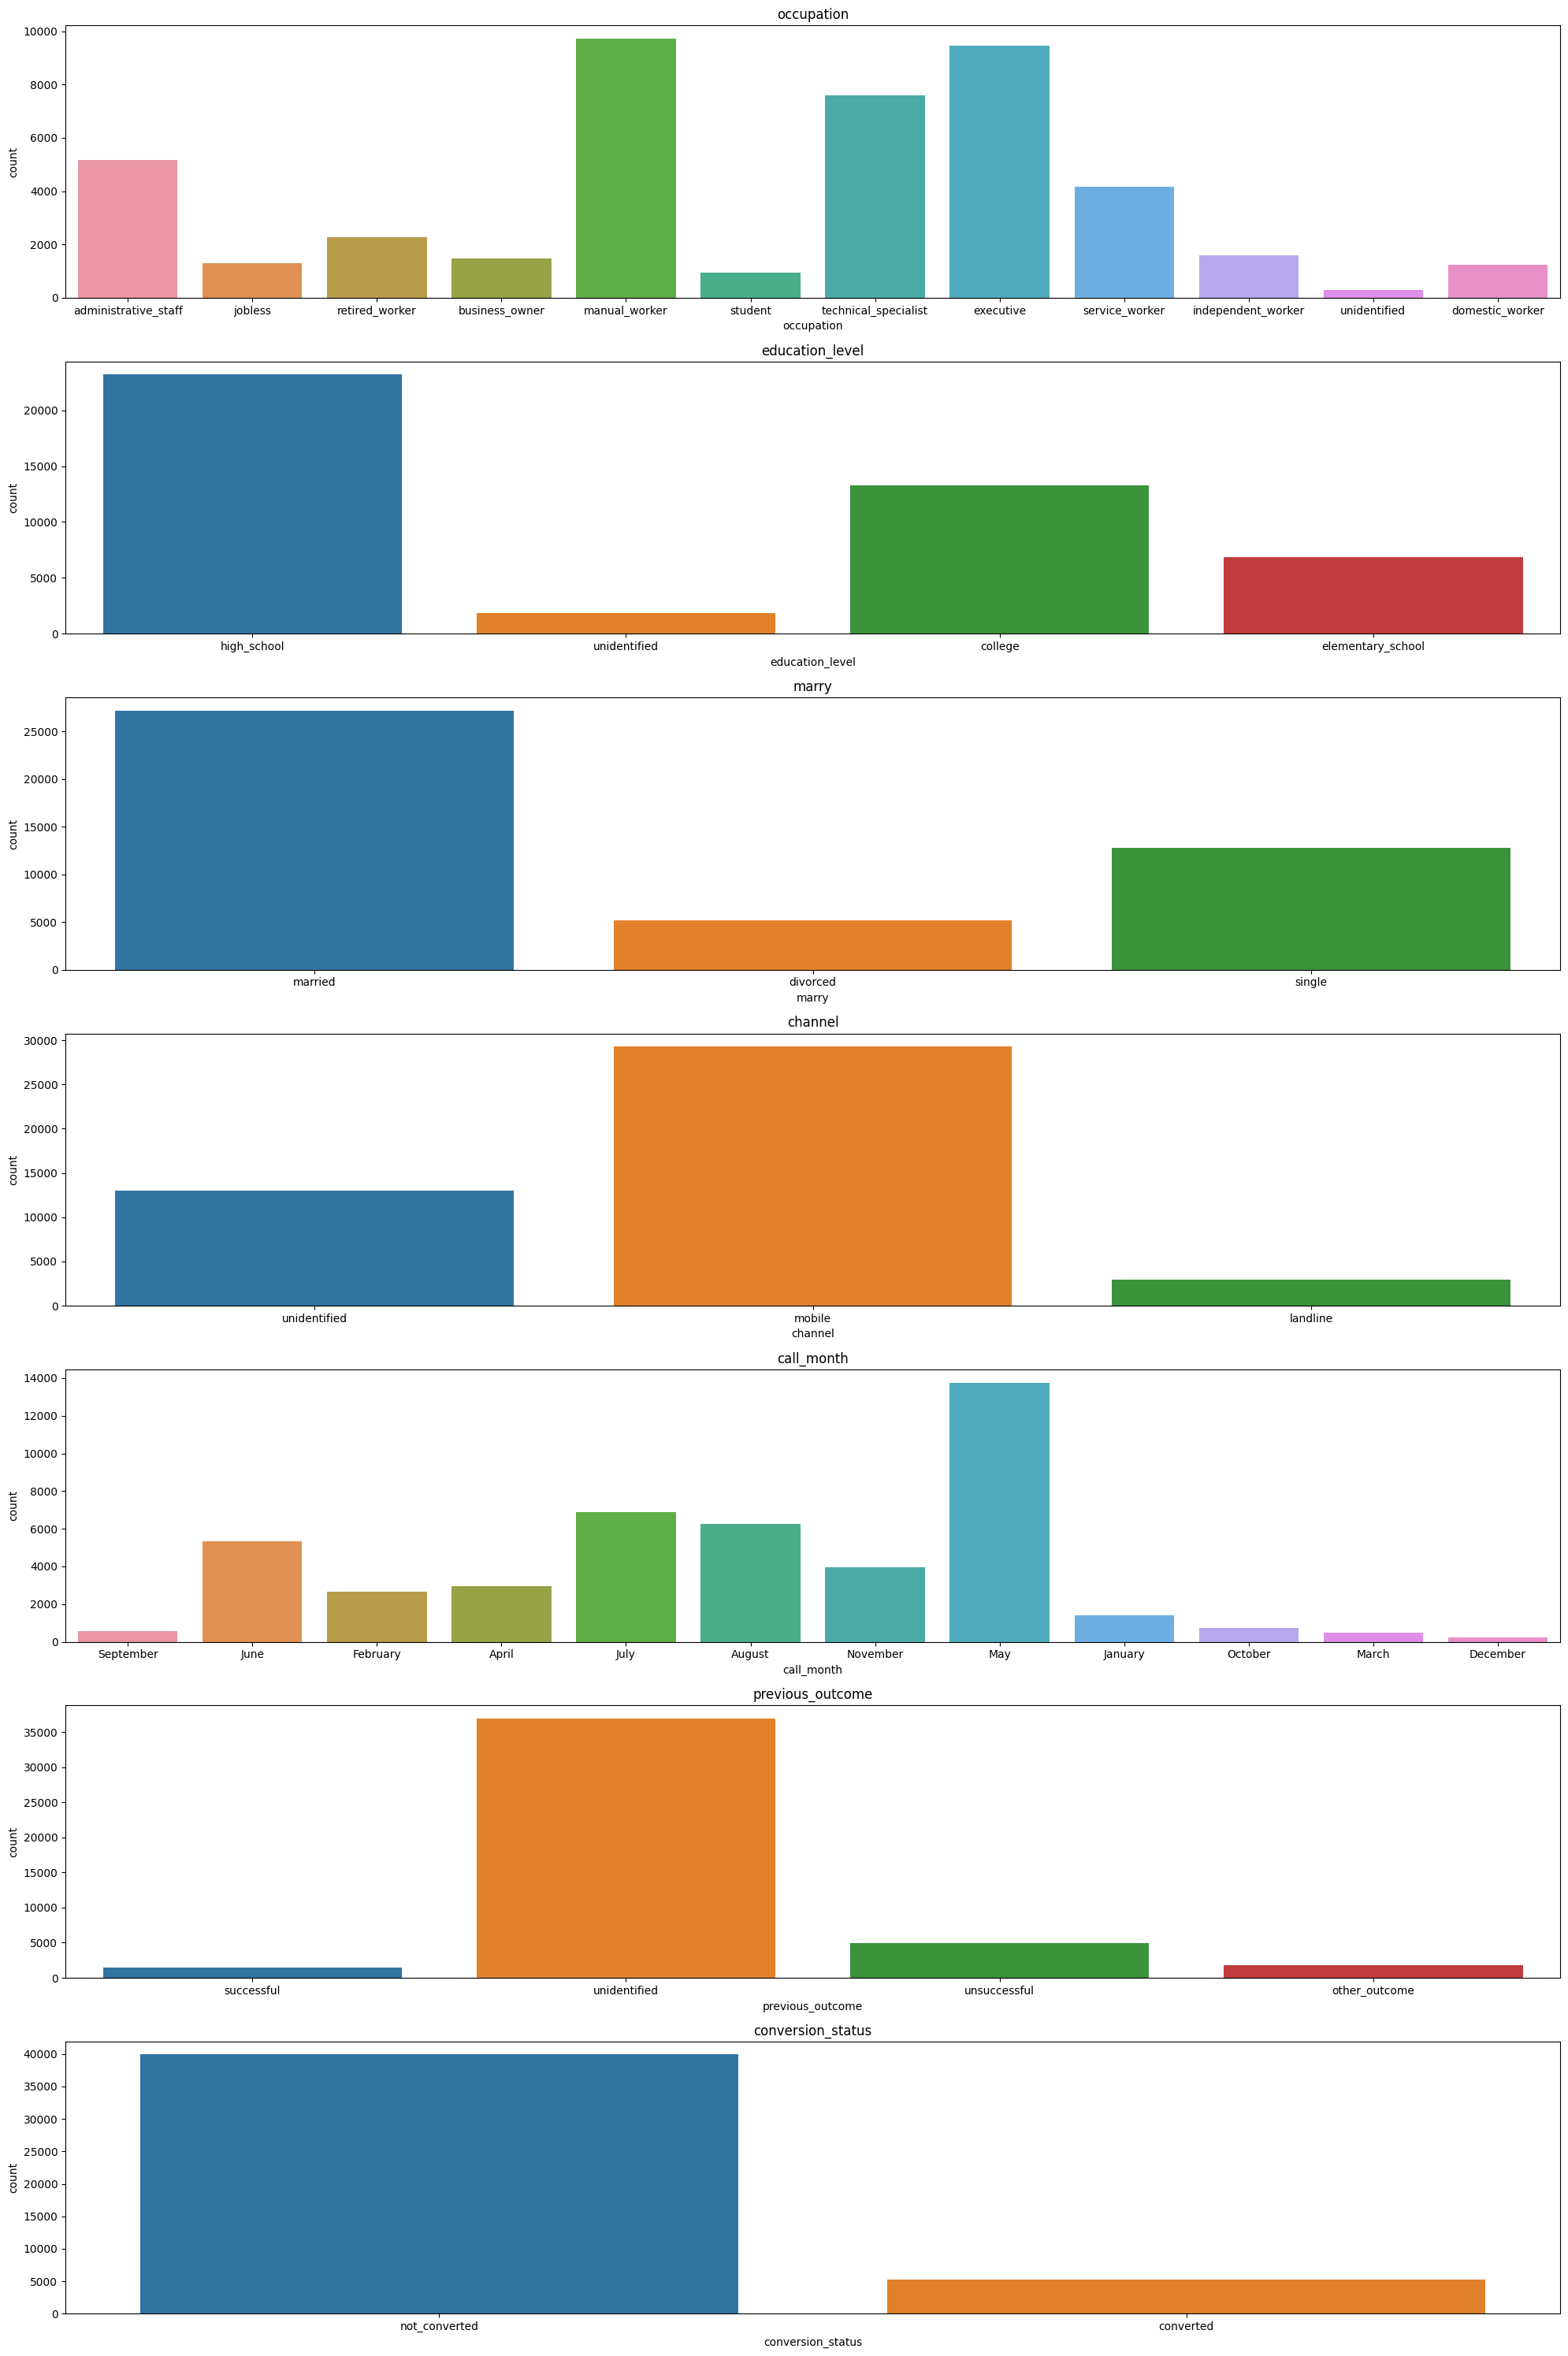

In [16]:
f, ax = plt.subplots(7,1, figsize=(20, 30))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
      

plt.tight_layout()
plt.show()  

--------------

**Average age by conversion_status**

In [17]:
avgage_by_cs = df.groupby(['conversion_status'])['age'].mean().reset_index().sort_values(by='age', ascending=False)

In [22]:
avgage_by_cs

,conversion_status,age
0,converted,41.670070
1,not_converted,40.839964


In [23]:
px.bar(avgage_by_cs, x='conversion_status',y='age',title='Average age by conversion_status', text_auto=True)

----------

**Average call_frequency by conversion_status**

In [27]:
avgfre_by_cs = df.groupby(['conversion_status'])['call_frequency'].mean().reset_index().sort_values(by='call_frequency', ascending=False)

In [28]:
avgfre_by_cs

,conversion_status,call_frequency
1,not_converted,2.846427
0,converted,2.141047


In [31]:
px.bar(avgfre_by_cs, x='conversion_status', y='call_frequency',title='Average age by conversion_status', text_auto=True)

---------

**Average call_frequency by month**

In [24]:
avgfre = df.groupby(['call_month'])['call_frequency'].mean().reset_index().sort_values(by='call_frequency', ascending=False)

In [25]:
avgfre

,call_month,call_frequency
1,August,3.927942
5,July,3.524804
6,June,3.135044
8,May,2.447657
3,February,2.382031
7,March,2.205451
2,December,2.196262
0,April,1.955321
9,November,1.918136
11,September,1.765112


In [29]:
px.bar(avgfre, x='call_month',y='call_frequency',title='Average call_frequency by month', text_auto=True)

----------

**Average call_duration by conversion_status**

In [33]:
avg_callduration = df.groupby(['conversion_status'])['call_duration'].mean().reset_index().sort_values(by='call_duration', ascending=False)

In [34]:
avg_callduration

,conversion_status,call_duration
0,converted,537.294574
1,not_converted,221.199870


In [35]:
px.bar(avg_callduration, x='conversion_status',y='call_duration',title='Average call_duration by conversion_status', text_auto=True)

---------

**Correlation**

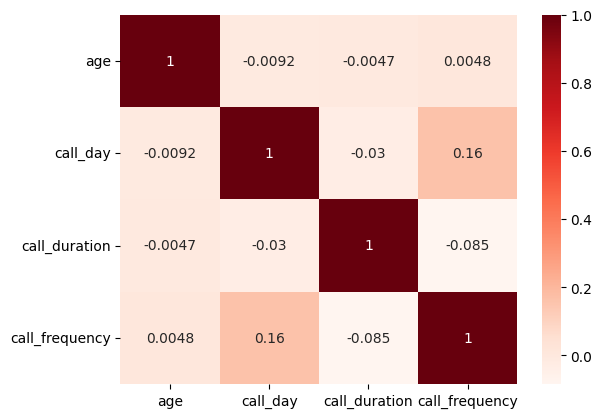

In [39]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Reds')
plt.show()

------------

# **4. Modeling**

**Import**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score , confusion_matrix

In [52]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [55]:
X = df.drop(columns=['conversion_status'])
y = df['conversion_status']

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**RandomForest**

In [63]:
RF = RandomForestClassifier(random_state=42)

In [64]:
RF.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [65]:
pred_RF = RF.predict(X_test)

In [67]:
confusion_matrix(Y_test,pred_RF)

array([[ 436,  585],
       [ 271, 7749]])

In [69]:
print(f'accuracy : {accuracy_score(Y_test,pred_RF)}')

accuracy : 0.9053202079415994


----------

**LogisticRegression**

In [71]:
LGR = LogisticRegression()

In [72]:
LGR.fit(X_train, Y_train)

LogisticRegression()

In [75]:
pred_LGR = LGR.predict(X_test)

In [76]:
confusion_matrix(Y_test,pred_LGR)

array([[ 188,  833],
       [ 148, 7872]])

In [78]:
print(f'accuracy : {accuracy_score(Y_test,pred_LGR)}')

accuracy : 0.8914943037274637


----------

# **5. Evaluation**

**Random Forest has a higher accuracy, so it is a better model.**

------------

**Please leave your advice in the comments. Thank you**